# Projet 2 : Analyse des données de systèmes éducatifs

## Problématique
- Projet d’extension à l’international de la start-up Academy qui évolue dans le domaine de la EdTech.
<br>
<br>
- Missions :
    - Analyse exploratoire des données
    - Déterminer si les données sur l’éducation de la banque mondiale permettent d’informer sur le projet d’expansion.
    
## Descriptipon du jeu de données :
Le jeu de données est issue de la banque mondiale. Il contient 05 fichiers sous format csv :

- EdStatsCountry.csv : Données économiques sur les pays et les régions géographiques du monde.
<br>
<br>
- EdStatsCountry-Series.csv : Information sur la source des indicateurs par pays.
<br>
<br>
- EdStatsData.csv : Données sur l’évolution des indicateurs dans le temps pour tous les pays et zones géographiques.
<br>
<br>
- EdStatsFootNote.csv : Données sur l’année d’origine de chaque indicateur par pays.
<br>
<br>
- EdStatsSeries.csv : Description détaillée des indicateurs par pays.
<br>
<br>
=> Nous travaillons essentiellement avec les fichiers "EdStatsCountry.csv" et "EdStatsData.csv".

## Importation des modules python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1. Exploitation du jeu de données EdStatCountry

- Importation du jeu de données des pays et régions géographiques ainsi que leurs données économiques

In [2]:
# Dataset that contains informations about all countries and areas around the world
edstat_country = pd.read_csv("EdStatsCountry.csv", delimiter=",")
edstat_country.sample(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
161,NGA,Nigeria,Nigeria,Federal Republic of Nigeria,NG,Nigerian naira,Based on official government statistics releas...,Sub-Saharan Africa,Lower middle income,NG,...,General Data Dissemination System (GDDS),2006,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2013,NaN,2012.0,2005,NaN
94,HTI,Haiti,Haiti,Republic of Haiti,HT,Haitian gourde,Fiscal year end: September 30; reporting perio...,Latin America & Caribbean,Low income,HT,...,General Data Dissemination System (GDDS),2003,HIV/Maternal and Child Health (HIV/MCH) Servic...,"Integrated household survey (IHS), 2001",NaN,2008/ 2009,NaN,1997.0,2000,NaN
181,PSE,West Bank and Gaza,West Bank and Gaza,West Bank and Gaza,PS,Israeli new shekel,NaN,Middle East & North Africa,Lower middle income,GZ,...,Special Data Dissemination Standard (SDDS),2007,"Multiple Indicator Cluster Survey (MICS), 2010","Integrated household survey (IHS), 2009",NaN,NaN,2010.0,NaN,2005,NaN
147,MMR,Myanmar,Myanmar,Republic of the Union of Myanmar,MM,Myanmar kyat,Fiscal year end: March 31; reporting period fo...,East Asia & Pacific,Low income,MM,...,General Data Dissemination System (GDDS),1983,"Multiple Indicator Cluster Survey (MICS), 2009/10",NaN,NaN,2010,2003.0,2010.0,2000,NaN
72,FRO,Faeroe Islands,Faeroe Islands,Faeroe Islands,FO,Danish krone,NaN,Europe & Central Asia,High income: nonOECD,FO,...,NaN,2011,NaN,NaN,Yes,NaN,NaN,2009.0,NaN,NaN
132,LVA,Latvia,Latvia,Republic of Latvia,LV,Latvian lats,Country joined euro area on 1 January 2014; da...,Europe & Central Asia,High income: nonOECD,LV,...,Special Data Dissemination Standard (SDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2008",Yes,2010,2010.0,2012.0,2002,NaN
105,JAM,Jamaica,Jamaica,Jamaica,JM,Jamaican dollar,April 2013 database update: Based on official ...,Latin America & Caribbean,Upper middle income,JM,...,General Data Dissemination System (GDDS),2011,"Multiple Indicator Cluster Survey (MICS), 2011",Living Standards Measurement Study Survey (LSM...,NaN,2007,NaN,2012.0,1993,NaN
113,KNA,St. Kitts and Nevis,St. Kitts and Nevis,St. Kitts and Nevis,KN,East Caribbean dollar,April 2012 database update: Based on official ...,Latin America & Caribbean,High income: nonOECD,KN,...,General Data Dissemination System (GDDS),2011,NaN,NaN,Yes,NaN,NaN,2011.0,NaN,NaN
60,ECS,Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Europe & Central Asia (all income levels),Z7,NaN,Europe and Central Asia regional aggregate (in...,NaN,NaN,Z7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,GAB,Gabon,Gabon,Gabonese Republic,GA,CFA franc,NaN,Sub-Saharan Africa,Upper middle income,GA,...,General Data Dissemination System (GDDS),2013,"Demographic and Health Survey (DHS), 2012",Core Welfare Indicator Questionnaire Survey (C...,NaN,NaN,NaN,2009.0,2005,NaN


- Analyse exploratoire du jeu de données

In [3]:
# Numer of countries and areas 
print(f""" We've got {len(edstat_country["Country Code"].unique())} countries and geographic zones.""")
print("\n")
# Checking duplicated data
print(f"The number of duplicated areas is : {len(edstat_country[edstat_country.duplicated(['Country Code'])])}")

 We've got 241 countries and geographic zones.


The number of duplicated areas is : 0


In [4]:
# infos of the dataframe
edstat_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

=> Ce jeu de données contient 241 lignes uniques qui correspondent aux différents pays et zones géographiques du monde.

=> Il ne contient aucun doublon de pays, de région géographique ou de territoire autonome.

Définissons une variable qui contient les régions géographiques :

In [5]:
# Areas that are not countries :
# Dans le dataframe Country les pays ont normalement tous une currency(une monnaie)
are_not_countries=edstat_country.loc[edstat_country["Currency Unit"].isna(), "Country Code"]
are_not_countries.sample(10)

127    LMC
68     EUU
124    LIC
63     EMU
200    SSF
60     ECS
57     EAP
122    LCN
58     EAS
5      ARB
Name: Country Code, dtype: object

Voici ci-dessous les pays et territoires autonomes présents dans ce dataset :

In [7]:
# List of actual countries
countries = list(edstat_country.loc[~edstat_country['Country Code'].isin(are_not_countries.tolist())]['Short Name'].unique())
print(f""""We"ve got {len(countries)} countries and autonomous territories.""")
print("\n")
print("-"*125)
print("\n")
print(countries)

"We"ve got 215 countries and autonomous territories.


-----------------------------------------------------------------------------------------------------------------------------


['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finla

**Représentation graphique des pays en fonction de leurs régions, leurs revenues ainsi que leurs monnaies.**

- Je remplace d'abord les régions inconnues(les "nan") par "Other regions" et les groupes de revenues inconnus par "Others"

In [16]:
# Replacing 'nan' by 'Other regions'
edstat_country['Region'] = edstat_country['Region'].replace(np.nan, 'Other regions')

# Replacing 'nan' by 'Others'
edstat_country['Income Group'] = edstat_country['Income Group'].replace(np.nan, 'Others')

print(f"All regions are in {edstat_country['Region'].unique()} and all income groups are in : \n{edstat_country['Income Group'].unique()}")

All regions are in ['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Other regions' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America'] and all income groups are in : 
['High income: nonOECD' 'Low income' 'Upper middle income' 'Others'
 'Lower middle income' 'High income: OECD']


- Représentation graphique

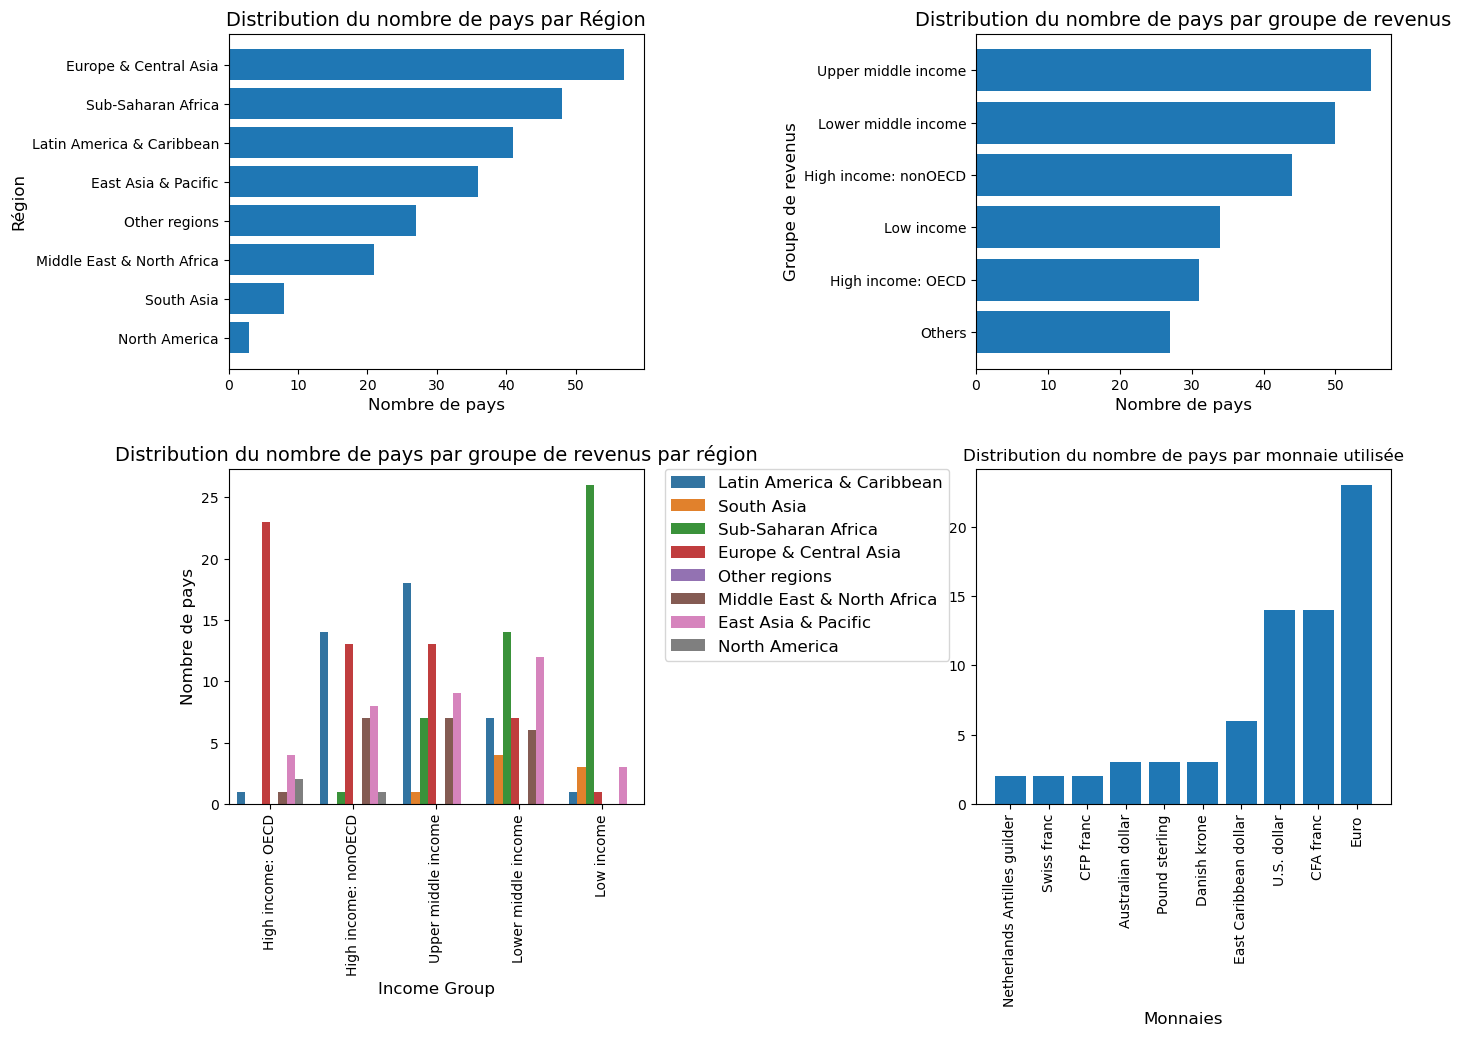

In [25]:
figure=plt.figure(figsize=(15,10))
grid = plt.GridSpec(2, 2, wspace=0.8, hspace=0.3)

# Countries per region
plt.subplot(grid[0, 0])
plt.barh(y=edstat_country.groupby('Region')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Region'], width=edstat_country.groupby('Region')[['Short Name']].count()['Short Name'].sort_values())
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Région', fontsize=12)
plt.title('Distribution du nombre de pays par Région', fontsize=14)

# Countries per income group
plt.subplot(grid[0, 1])
plt.barh(y = edstat_country.groupby('Income Group')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Income Group'], width=edstat_country.groupby('Income Group')[['Short Name']].count()['Short Name'].sort_values())
plt.xlabel('Nombre de pays', fontsize=12)
plt.ylabel('Groupe de revenus', fontsize=12)
plt.title('Distribution du nombre de pays par groupe de revenus', fontsize=14)


# Countries per income group per region
plt.subplot(grid[1, 0])
sns.countplot(data=edstat_country,x='Income Group', hue='Region',order=['High income: OECD', 
                'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'],
                   )
plt.xlabel('Income Group', fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('Nombre de pays', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.title('Distribution du nombre de pays par groupe de revenus par région', fontsize=14)

# Ten most used currency units
plt.subplot(grid[1, 1])
plt.bar(x = edstat_country.groupby('Currency Unit')[['Short Name']].count().reset_index().sort_values(by='Short Name')['Currency Unit'].tail(10), height = edstat_country.groupby('Currency Unit')[['Short Name']].count()['Short Name'].sort_values().tail(10))
plt.xlabel('Monnaies', fontsize=12)
plt.xticks(rotation=90)
#plt.ylabel('Nombre de pays', fontsize=12)
plt.title('Distribution du nombre de pays par monnaie utilisée')

plt.show()

# 2. Analyse pré-exploratoire du jeu de données EdStatsData

- Importation du jeu données

In [8]:
# Dataset that contains information about countries, indicators and the years we got the indicator values
edstatsdata = pd.read_csv("EdStatsData.csv", delimiter=",")
edstatsdata.sample(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
498671,Liberia,LBR,Barro-Lee: Average years of tertiary schooling...,BAR.TER.SCHL.6064.FE,0.02,NaN,NaN,NaN,NaN,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162386,Belize,BLZ,"Enrolment in early childhood education, public...",UIS.E.0.PU.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55575,Middle East & North Africa,MEA,DHS: Primary completion rate. Female,HH.DHS.PCR.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591341,Namibia,NAM,Government expenditure per post-secondary non-...,UIS.XUNIT.GDPCAP.4.FSGOV,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372951,Greenland,GRL,SABER: (Student Assessment) Policy Goal 2 Leve...,SABER.STD.ASS.GOAL2.LVL3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421366,Indonesia,IDN,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.80UP.NED.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,NaN
384215,Guatemala,GTM,TIMSS: Fourth grade students who did not reach...,LO.TIMSS.SCI4.BL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645704,Papua New Guinea,PNG,DHS: Typology of out-of-school children. Prima...,HH.DHS.OOST.X.Q3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
450158,Japan,JPN,TIMSS: Female 4th grade students reaching the ...,LO.TIMSS.MAT4.HI.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122785,Armenia,ARM,PASEC: Percentage of 2nd grade students correc...,LO.PASEC.MAT.2.ADD3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Description du jeu de données

In [9]:
# Infos of the dataset
edstatsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [20]:
# Indicators feature description
print(f"""We've got {len(edstatsdata["Indicator Name"].unique())} indicators.""")
print("\n")
# Checking if there is any duplicated indicator for a country 
print(f"The number of duplicated indicators for each country/region is : {edstatsdata.loc[edstatsdata.duplicated(['Country Code', 'Indicator Code'])].shape[0]}")

We've got 3665 indicators.


The number of duplicated indicators for each country/region is : 0


- EdStatsData.csv contient 886930 lignes.
<br>
<br>
- Il contient 70 colonnes dont :
   - Le nom et le code de chaque pays/région.
   - Le nom et le code des indicateurs.
   - La valeurs des indicateurs pour chaque année.
<br>        
<br>
- Nous avons 3665 indicateurs uniques parmi lesquelles nous allons choisir les plus pertinents pour notre analyse.
<br>        
<br>
- Il n'y a pas de duplication d'un indicateur pour un pays donné 

### Choix des années à garder

- Visualisation du taux de remplissage des indicateurs par année

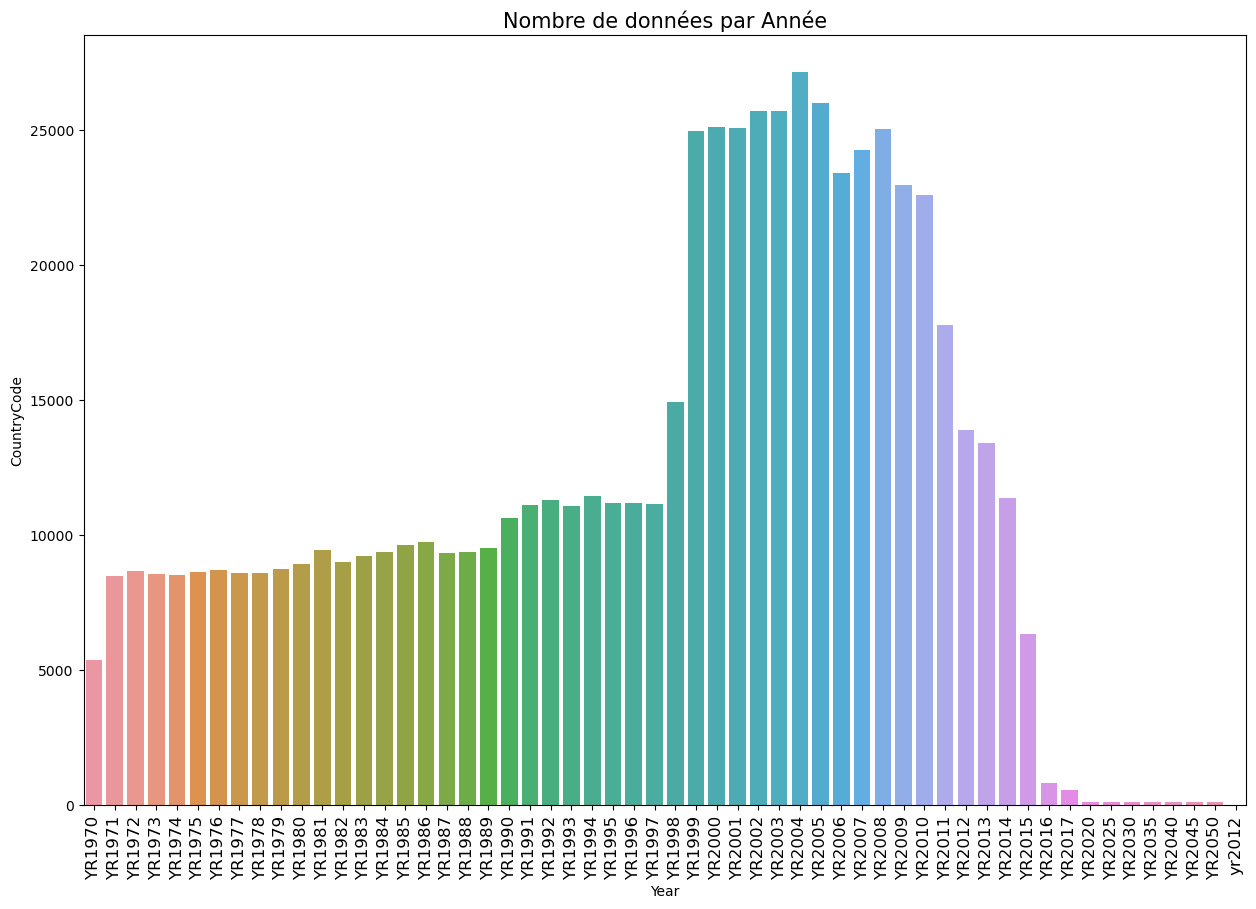

In [22]:
# Import EdstatsFootNote : Données sur l'année d'origine de chaque indicateur par pays.
edstatsfootnote = pd.read_csv("EdStatsFootNote.csv", delimiter=",")

# Indicator per years
plt.figure(figsize=(15, 10))
plot = sns.barplot(y = 'CountryCode', x='Year', data = edstatsfootnote.groupby('Year').count().reset_index())
plot.set_xticklabels(labels = edstatsfootnote.groupby('Year').count().reset_index()['Year'], rotation=90, size=12)
plt.title('Nombre de données par Année', size=15)
plt.show()

- La plupart des années contiennent essentiellement très peu de données. 
<br>
<br>
- Nous avons choisi de ne conserver que les années où les indicateurs sont assez remplis. 
<br>
<br>
- Nous allons nous limiter à l'intervalle d'années 1998 - 2013 qui regroupe l'essentiel des données d'indicateurs.

In [26]:
# Selecting years to keep 

# List of the years between 1998 and 2013
years = [str(i) for i in range(1998, 2014)]
# List of the first four columns of the dataset
data_columns=list(edstatsdata.iloc[:,:4].columns)

# List of all selected columns
data_columns.extend(years)

# The new dataset
edstatsdata_1998_2013 = edstatsdata.loc[:,data_columns]
print(edstatsdata_1998_2013.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1998            84914 non-null   float64
 5   1999            118839 non-null  float64
 6   2000            176676 non-null  float64
 7   2001            123509 non-null  float64
 8   2002            124205 non-null  float64
 9   2003            130363 non-null  float64
 10  2004            128814 non-null  float64
 11  2005            184108 non-null  float64
 12  2006            140312 non-null  float64
 13  2007            137272 non-null  float64
 14  2008            134387 non-null  float64
 15  2009            142108 non-null  float64
 16  2010            242442 non-null  float64
 17  2011      

### Suppression des valeurs manquantes

In [27]:
# Drop empty lines
edstatsdata_1998_2013 = edstatsdata_1998_2013.dropna(how = 'all', subset = years)
edstatsdata_1998_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342811 entries, 4 to 886929
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    342811 non-null  object 
 1   Country Code    342811 non-null  object 
 2   Indicator Name  342811 non-null  object 
 3   Indicator Code  342811 non-null  object 
 4   1998            84914 non-null   float64
 5   1999            118839 non-null  float64
 6   2000            176676 non-null  float64
 7   2001            123509 non-null  float64
 8   2002            124205 non-null  float64
 9   2003            130363 non-null  float64
 10  2004            128814 non-null  float64
 11  2005            184108 non-null  float64
 12  2006            140312 non-null  float64
 13  2007            137272 non-null  float64
 14  2008            134387 non-null  float64
 15  2009            142108 non-null  float64
 16  2010            242442 non-null  float64
 17  2011      

- Après suppression des lignes entièrement vides, il ne reste plus que 342811 lignes.

### Choix des indicateurs les plus pertinents à garder pour répondre aux demandes de l'étude

Pour répondre aux enjeux, nous avons cherché les indicateurs qui renseignent sur la population des pays, l'accès à l'internet ainsi que le niveau de vie global des pays.

- Données sur la population des pays
  - SP.POP.TOTL : population totale 
  - SP.POP.GROW : taux de croissance de la population
  - SP.POP.1524.TO.UN : population totale de la tranche 15-24 ans
<br>
<br>  
- Accès internet
  - IT.NET.USER.P2 : pourcentage d'utilisateurs d'internet
  - IT.CMP.PCMP.P2 : pourcentage de possesseurs d'un ordinateur personnel
<br>
<br>
- Niveau de vie du pays
  - NY.GDP.PCAP.PP.CD : PIB par habitant 

In [30]:
# Selected indicators
population_indicators = ["SP.POP.TOTL","SP.POP.1524.TO.UN","SP.POP.GROW"]
internet_indicators = ['IT.NET.USER.P2', 'IT.CMP.PCMP.P2']
GDP_indicators = ['NY.GDP.PCAP.PP.CD']
# List of selected indicators
indicators = list()
indicators.extend(population_indicators)
indicators.extend(internet_indicators)
indicators.extend(GDP_indicators)

# Keep only selected indicators
edstatsdata_1998_2013 = edstatsdata_1998_2013.loc[edstatsdata_1998_2013['Indicator Code'].isin(indicators)].reset_index(drop=True)
# Median value column for each indicator in the 1998-2013 years
edstatsdata_1998_2013["median_valueIndicators"] = edstatsdata_1998_2013.median(axis=1, numeric_only=True)
edstatsdata_1998_2013.shape

(1335, 21)

- Visualisation du taux de remplissage des indicateurs choisis

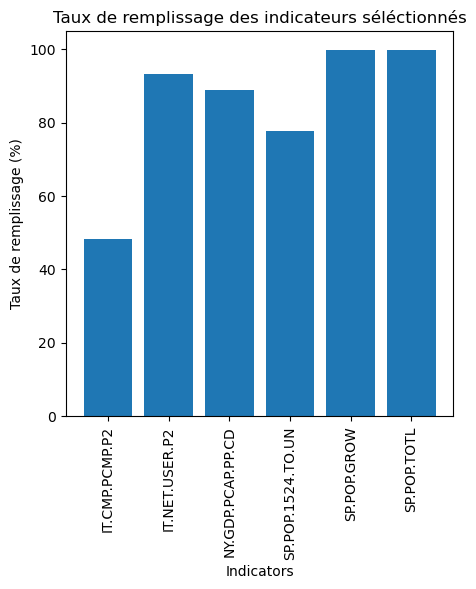

In [32]:
# We count how many values we have for each indicator and we devide it by the number of countries
indicator_per_year_per_country = edstatsdata_1998_2013.drop(columns=["Country Code","Country Name","Indicator Name"]).set_index("Indicator Code").notnull().groupby("Indicator Code").sum()
indicator_per_year_per_country_rated = (indicator_per_year_per_country / len(edstatsdata_1998_2013["Country Code"].unique())) * 100

# Plotting the result
fig = plt.figure(figsize=(5,5))
plt.bar(indicator_per_year_per_country_rated.index.values, indicator_per_year_per_country_rated.mean(axis=1))
plt.title("Taux de remplissage des indicateurs séléctionnés")
plt.xlabel("Indicators")
plt.xticks(rotation = 90)
plt.ylabel("Taux de remplissage (%)")
plt.show()

In [33]:
indicator_per_year_per_country

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,median_valueIndicators
Indicator Code,,,,,,,,,,,,,,,,,
IT.CMP.PCMP.P2,176,183,187,207,206,203,204,196,117,49,27,3,0,0,0,0,216
IT.NET.USER.P2,212,219,221,222,224,218,221,223,222,229,228,227,227,229,227,226,230
NY.GDP.PCAP.PP.CD,206,207,211,213,214,214,214,214,214,214,215,215,215,217,213,213,217
SP.POP.1524.TO.UN,188,189,190,191,192,192,191,191,187,181,181,181,181,181,181,181,192
SP.POP.GROW,238,240,240,240,240,240,240,240,240,240,240,240,240,239,239,239,240
SP.POP.TOTL,240,240,240,240,240,240,240,240,240,240,240,240,240,240,239,239,240


- L'indicateur IT.CMP.PCMP.P2 est le moins rempli parmi les indicateurs selectionnés. Il n'est en fait pas renseigné au delà de 2009. 

### Suppression des pays les moins peuplés
- Nous supprimons les pays dont la population totale n'atteint pas 2000000 d'habitants.

In [35]:
# Removing very small countries in term of population

# Threshold of population where we choose to stop in.
min_pop = 2000000

# Countries and their population distributions
populations = edstatsdata_1998_2013.loc[edstatsdata_1998_2013["Indicator Code"] == "SP.POP.TOTL"].reset_index().set_index("Country Code").median(numeric_only=True,axis=1).to_frame()
populations.rename(columns={0:"Population"}, inplace=True)

# Countries above threshold :
most_populated_countries = populations.loc[populations.Population>=min_pop].index.tolist()

# We keep only populated countries
edstatsdata_1998_2013 = edstatsdata_1998_2013.loc[edstatsdata_1998_2013["Country Code"].isin(most_populated_countries)]
edstatsdata_1998_2013.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 975 entries, 0 to 1334
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            975 non-null    object 
 1   Country Code            975 non-null    object 
 2   Indicator Name          975 non-null    object 
 3   Indicator Code          975 non-null    object 
 4   1998                    940 non-null    float64
 5   1999                    949 non-null    float64
 6   2000                    950 non-null    float64
 7   2001                    966 non-null    float64
 8   2002                    965 non-null    float64
 9   2003                    959 non-null    float64
 10  2004                    960 non-null    float64
 11  2005                    960 non-null    float64
 12  2006                    899 non-null    float64
 13  2007                    849 non-null    float64
 14  2008                    832 non-null    f

- Après suppression des pays très peu peuplés, il ne reste plus que 975 lignes dans le jeu de données.

### Nous transformons ci-dessous le jeu de données pour avoir les indicateurs en colonnes et les pays en lignes.

In [36]:
# Countries and areas separated into two dataframes
        # are_not_countries is the variable we defined in the dataframe edstatcountry
edstatdata_regional = edstatsdata_1998_2013.loc[edstatsdata_1998_2013["Country Code"].isin(are_not_countries)]
edstatsdata_countries = edstatsdata_1998_2013.loc[~edstatsdata_1998_2013["Country Code"].isin(are_not_countries)]

# Dataframe with the median value of each indicator except IT.CMP.PCMP.P2(the less filled indicator) for each country 
edstatsdata_indicator_countries = edstatsdata_countries.pivot(index='Country Code',columns='Indicator Code',values='median_valueIndicators')
edstatsdata_indicator_countries.drop(columns=["IT.CMP.PCMP.P2"],inplace=True)

# We fill the IT.CMP.PCMP.P2 indicator with the 2000-2009 years where we got values
filled_PCMP_years = [str(i) for i in range(2000,2010)]
PCMP_data = edstatsdata.loc[(edstatsdata["Indicator Code"]=="IT.CMP.PCMP.P2")&(edstatsdata["Country Code"].isin(most_populated_countries))].drop(columns=["Country Name", "Indicator Name", "Indicator Code"]).set_index("Country Code").filter(items=filled_PCMP_years).median(axis=1).to_frame().rename(columns={0:"IT.CMP.PCMP.P2"})

# Merge edstatsdata_indicator_countries with PCMP_data
edstatsdata_indicator_countries = edstatsdata_indicator_countries.merge(PCMP_data, how="left", left_index=True, right_index=True)
edstatsdata_indicator_countries.sample(10)

,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,IT.CMP.PCMP.P2
Country Code,,,,,,
BDI,0.599868,661.084634,1753472.0,3.097862,7549313.5,0.178956
SLE,0.221531,957.904422,1074701.0,2.636394,5753535.5,NaN
LAO,1.010125,2751.559471,1241594.0,1.576753,5801691.0,0.340267
PER,18.900000,7083.533947,5350810.5,1.280884,27780177.0,5.943094
IDN,4.183419,6297.263490,42482139.5,1.372567,228275466.0,1.264752
SAU,16.082295,41164.839277,4417186.5,2.782396,24241977.5,11.745345
NLD,82.350000,38943.052370,1955892.0,0.469122,16332984.5,51.301895
MMR,0.199588,2184.361900,9234894.0,0.877625,48664544.0,0.605117
GEO,6.803167,4675.031514,724553.0,-1.297940,4163000.0,3.767850


In [37]:
# Now we've got only 144 countries left. We will try to select the best ones 
edstatsdata_indicator_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, AFG to ZWE
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IT.NET.USER.P2     143 non-null    float64
 1   NY.GDP.PCAP.PP.CD  139 non-null    float64
 2   SP.POP.1524.TO.UN  141 non-null    float64
 3   SP.POP.GROW        144 non-null    float64
 4   SP.POP.TOTL        144 non-null    float64
 5   IT.CMP.PCMP.P2     139 non-null    float64
dtypes: float64(6)
memory usage: 11.9+ KB


In [38]:
# nummeric data description
edstatsdata_indicator_countries.describe()

,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1524.TO.UN,SP.POP.GROW,SP.POP.TOTL,IT.CMP.PCMP.P2
count,143.000000,139.000000,1.410000e+02,144.000000,1.440000e+02,139.000000
mean,20.181418,13352.889081,8.203486e+06,1.493305,4.515720e+07,12.335202
std,23.873465,15097.442246,2.629311e+07,1.293509,1.480834e+08,18.577099
min,0.000000,500.883889,2.639200e+05,-1.297940,2.003671e+06,0.019618
25%,1.900000,2488.460535,9.939995e+05,0.561301,5.424956e+06,0.802451
50%,9.400000,7416.268712,2.318424e+06,1.424867,1.113325e+07,3.869328
75%,27.830000,17399.691269,5.927451e+06,2.563410,3.083628e+07,13.450472
max,84.360000,76488.621474,2.204813e+08,5.954059,1.307370e+09,83.122328


- Ce jeu de données contient 144 pays.
<br>
<br>
- Sa description ci-dessus indique qu’il y a certains indicateurs non renseignés pour certains pays(valeurs manquantes).
<br>
<br>
- Il indique également qu’il y a des pays dont le score d’accès à l’internet est nul. Ces pays seront supprimés de l’étude.

#### Suppression des pays pauvres
- Nous supprimons les pays dont le PIB par habibat est inférieur à 80% de celui de la France.

In [39]:
# France GDP-PPP 
french_gdp_perhabitat = edstatsdata_1998_2013.loc[(edstatsdata_1998_2013["Country Code"]=="FRA")&(edstatsdata_1998_2013["Indicator Code"]=="NY.GDP.PCAP.PP.CD")]["median_valueIndicators"].values[0]

# Calculate the min GDP-PPP with respect of GDP-PPP of France
min_gdp_perhabitat = french_gdp_perhabitat  - (french_gdp_perhabitat *20) / 100

# Keep only countries with a high GDP per Habitat 
edstatsdata_indicator_countries = edstatsdata_indicator_countries.loc[edstatsdata_indicator_countries["NY.GDP.PCAP.PP.CD"]>=min_gdp_perhabitat]
edstatsdata_indicator_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, ARE to USA
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IT.NET.USER.P2     28 non-null     float64
 1   NY.GDP.PCAP.PP.CD  28 non-null     float64
 2   SP.POP.1524.TO.UN  27 non-null     float64
 3   SP.POP.GROW        28 non-null     float64
 4   SP.POP.TOTL        28 non-null     float64
 5   IT.CMP.PCMP.P2     28 non-null     float64
dtypes: float64(6)
memory usage: 1.5+ KB


In [41]:
# Change column names
column_names = { 
    'IT.NET.USER.P2': 'Internet users (%)', 
    'NY.GDP.PCAP.PP.CD': 'PIB per habitat (PPA)', 
    'SP.POP.1524.TO.UN': 'Population 15-24 years',
    'SP.POP.GROW': 'Growth pop. (%)',
    'IT.CMP.PCMP.P2': 'Computer owners (%)',
    "Short Name": "Country Name"}

# Put Country Name into columns
edstatsdata_indicator_countries = edstatsdata_indicator_countries.dropna(subset=["SP.POP.1524.TO.UN"]).drop(columns=["SP.POP.TOTL"], errors="ignore").merge(edstat_country[["Country Code", "Short Name"]].set_index("Country Code"),left_index=True, right_index=True).iloc[:,[5,0,1,2,3,4]].rename(columns=column_names)
edstatsdata_indicator_countries.sample(10)

,Country Name,Internet users (%),PIB per habitat (PPA),Population 15-24 years,Growth pop. (%),Computer owners (%)
Country Code,,,,,,
NLD,Netherlands,82.350000,38943.052370,1955892.0,0.469122,51.301895
AUT,Austria,60.800000,36329.239025,993999.5,0.359940,51.731853
OMN,Oman,7.777730,37946.289415,543258.5,2.750238,4.612869
CAN,Canada,72.030000,37072.239119,4361202.5,0.991925,52.181541
FIN,Finland,77.070000,33188.101577,655269.0,0.363013,45.180672
AUS,Australia,69.450000,33474.287880,2824921.0,1.334074,53.809482
GRC,Greece,28.125000,25516.386098,1333422.0,0.264242,8.539007
CHE,Switzerland,72.900000,42852.310988,899375.5,0.749194,83.122328
DNK,Denmark,83.880000,35733.636117,623118.5,0.360739,59.652400


In [42]:
edstatsdata_indicator_countries.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, ARE to USA
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            27 non-null     object 
 1   Internet users (%)      27 non-null     float64
 2   PIB per habitat (PPA)   27 non-null     float64
 3   Population 15-24 years  27 non-null     float64
 4   Growth pop. (%)         27 non-null     float64
 5   Computer owners (%)     27 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.5+ KB


- Nous conservons donc les pays où le niveau de vie est plus ou moins comparable à celui de la France. 
<br>
<br>
- Après suppression de ces pays, il ne reste plus que 28 pays dans le jeu de données.
<br>
<br>
- Nous avons ensuite enlevé de l'étude les pays dont la population des 18 − 24 ans n'est pas renseignée. Il n'y en a qu'un parmi ceux dont le PIB par habitat est proche de celui de la France

### Choix des pays avec un meilleur potentiel de clients

- ==> Etudions d'abord la statistique des indicateurs par région géographique

In [43]:
# indicator per region dataframe
indicator_per_region = edstatsdata.loc[edstatsdata["Indicator Code"].isin(list(column_names.keys())[:-1])].drop(columns=["Country Name", "Indicator Name"]).reset_index(drop=True)

# Geographic regions
regions = edstat_country[edstat_country["Country Code"].isin(most_populated_countries)].set_index("Country Code").filter(items=["Region"])

# Merge the two data
indicator_per_region = indicator_per_region.merge(regions, left_on="Country Code", right_index=True).rename(columns={"Region_x":"Region"})

# Grouping by "Indicator Code" and "Region"
indicator_per_region=indicator_per_region.drop(columns=["Country Code"], errors="ignore").groupby(["Indicator Code", "Region"]).median(numeric_only=True)

# Regional statistics : mean, median and standard deviations
indicator_per_region_mean = indicator_per_region.mean(axis=1,numeric_only=True).to_frame()
indicator_per_region_std = indicator_per_region.std(axis=1,numeric_only=True).to_frame()
indicator_per_region_median = indicator_per_region.median(axis=1,numeric_only=True).to_frame()

# Mean value of the indicator per region
indicator_per_region_mean=pd.concat([indicator_per_region_mean.loc["IT.CMP.PCMP.P2"].rename(columns={0: "IT.CMP.PCMP.P2"}),
           indicator_per_region_mean.loc["IT.NET.USER.P2"].rename(columns={0: "IT.NET.USER.P2"}),
          indicator_per_region_mean.loc["IT.CMP.PCMP.P2"].rename(columns={0: "NY.GDP.PCAP.PP.CD"}),
          indicator_per_region_mean.loc["IT.CMP.PCMP.P2"].rename(columns={0: "SP.POP.1524.TO.UN"}),
          indicator_per_region_mean.loc["IT.CMP.PCMP.P2"].rename(columns={0: "SP.POP.GROW"})],axis=1)

# Median value of the indicator per region
indicator_per_region_std=pd.concat([indicator_per_region_std.loc["IT.CMP.PCMP.P2"].rename(columns={0: "IT.CMP.PCMP.P2"}),
           indicator_per_region_std.loc["IT.NET.USER.P2"].rename(columns={0: "IT.NET.USER.P2"}),
          indicator_per_region_std.loc["IT.CMP.PCMP.P2"].rename(columns={0: "NY.GDP.PCAP.PP.CD"}),
          indicator_per_region_std.loc["IT.CMP.PCMP.P2"].rename(columns={0: "SP.POP.1524.TO.UN"}),
          indicator_per_region_std.loc["IT.CMP.PCMP.P2"].rename(columns={0: "SP.POP.GROW"})],axis=1)

# Std value of the indicator per region
indicator_per_region_median=pd.concat([indicator_per_region_median.loc["IT.CMP.PCMP.P2"].rename(columns={0: "IT.CMP.PCMP.P2"}),
           indicator_per_region_median.loc["IT.NET.USER.P2"].rename(columns={0: "IT.NET.USER.P2"}),
          indicator_per_region_median.loc["IT.CMP.PCMP.P2"].rename(columns={0: "NY.GDP.PCAP.PP.CD"}),
          indicator_per_region_median.loc["IT.CMP.PCMP.P2"].rename(columns={0: "SP.POP.1524.TO.UN"}),
          indicator_per_region_median.loc["IT.CMP.PCMP.P2"].rename(columns={0: "SP.POP.GROW"})],axis=1)

# Mean dataset
indicator_per_region_mean

,IT.CMP.PCMP.P2,IT.NET.USER.P2,NY.GDP.PCAP.PP.CD,SP.POP.1524.TO.UN,SP.POP.GROW
Region,,,,,
East Asia & Pacific,8.613781,9.569958,8.613781,8.613781,8.613781
Europe & Central Asia,10.123965,28.420785,10.123965,10.123965,10.123965
Latin America & Caribbean,2.893485,15.859482,2.893485,2.893485,2.893485
Middle East & North Africa,3.423078,10.166115,3.423078,3.423078,3.423078
North America,28.997618,48.835215,28.997618,28.997618,28.997618
South Asia,0.592902,3.826028,0.592902,0.592902,0.592902
Sub-Saharan Africa,0.255868,1.371712,0.255868,0.255868,0.255868


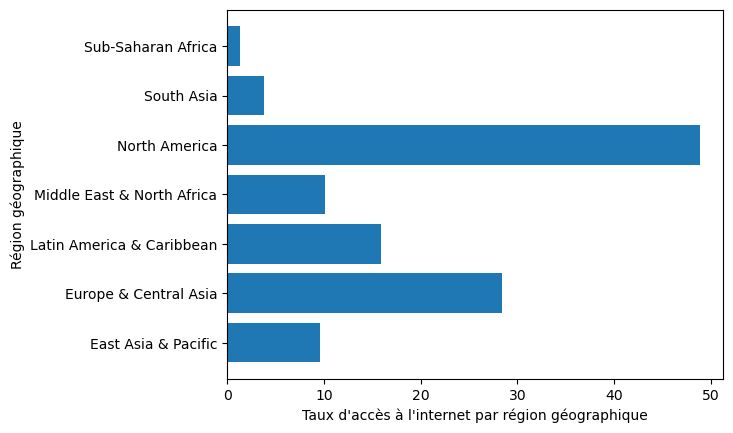

In [45]:
# Distribution de l'indicateur d'accès à l'internet
plt.barh(indicator_per_region_mean.index,indicator_per_region_mean["IT.NET.USER.P2"])
plt.xlabel("Taux d'accès à l'internet par région géographique")
plt.ylabel("Région géographique")
# plt.xticks(rotation=90)
plt.show()

- On voit clairement que l'accès à l'internet est plus évolué en Amérique du Nord, en Europe et en Asie centrale qu'ailleurs dans le monde.

### Choix définitif des pays les plus pertinents

- Normalisation des données pour mettre tous les indicateurs à la même échelle.

In [48]:
# numeric columns
numeric_cols = edstatsdata_indicator_countries.select_dtypes(include=['int64', "float64"]).columns
# MinMax scaling the indicator columns
# scale features
scaler = MinMaxScaler()
# All indicator values set between 0 and 1
edstatsdata_indicator_countries.loc[:,numeric_cols] = scaler.fit_transform(edstatsdata_indicator_countries.loc[:,numeric_cols])
edstatsdata_indicator_countries.sample(10)

,Country Name,Internet users (%),PIB per habitat (PPA),Population 15-24 years,Growth pop. (%),Computer owners (%)
Country Code,,,,,,
SAU,Saudi Arabia,0.108440,0.307819,0.093382,0.467604,0.090849
GRC,Greece,0.265692,0.001182,0.021058,0.044907,0.050008
ESP,Spain,0.539907,0.074691,0.111655,0.133144,0.246292
SGP,Singapore,0.701497,0.629599,0.002947,0.372816,0.721717
ITA,Italy,0.374986,0.112578,0.128802,0.051593,0.255870
AUT,Austria,0.692357,0.213064,0.013097,0.060971,0.600170
JPN,Japan,0.783803,0.135295,0.316610,0.009934,0.417445
CAN,Canada,0.838997,0.227623,0.092069,0.167056,0.605897
FRA,France,0.484345,0.119872,0.170274,0.099385,0.467340


- Visualisation en diagramme en boîte de l'indicateur d'accès à l'internet parmi ces pays séléctionnés

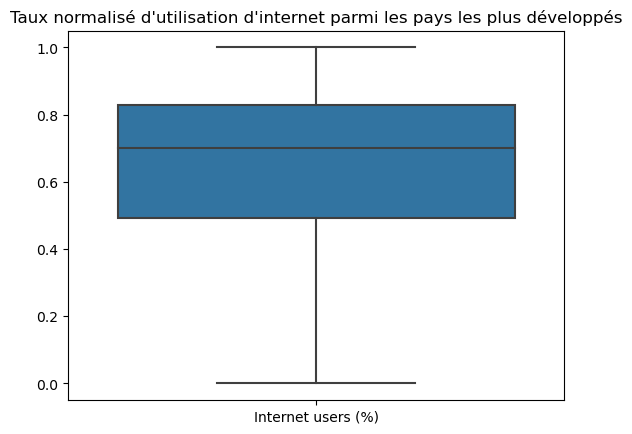

In [51]:
# Internet acces for these select countries
fig = plt.figure()
sns.boxplot(data = edstatsdata_indicator_countries.loc[:,['Internet users (%)']])
plt.title("Taux normalisé d'utilisation d'internet parmi les pays les plus développés")
# plt.ylabel("Distribution")
plt.xticks(rotation = "horizontal") 
plt.show()

- Nous décidons de ne garder que les pays dont le taux d'accès à l'internet est proche du quartile Q2(médiane) du boxplot.
<br>
<br>
- Puisque la valeur médiane est autour de 0.70, nous ne gardons que les pays où le taux d’accès à l’internet est au moins égale à 0.7.

In [52]:
edstatsdata_indicator_countries.loc[edstatsdata_indicator_countries["Internet users (%)"]>=0.7]

,Country Name,Internet users (%),PIB per habitat (PPA),Population 15-24 years,Growth pop. (%),Computer owners (%)
Country Code,,,,,,
AUS,Australia,0.805307,0.157120,0.056038,0.224489,0.626633
CAN,Canada,0.838997,0.227623,0.092069,0.167056,0.605897
CHE,Switzerland,0.850357,0.340885,0.010878,0.126311,1.000000
DEU,Germany,0.818169,0.150079,0.210392,0.000000,0.549315
DNK,Denmark,0.993732,0.201393,0.004399,0.061105,0.701056
FIN,Finland,0.904808,0.151512,0.005153,0.061486,0.516725
GBR,United Kingdom,0.804785,0.157163,0.174245,0.114372,0.498569
JPN,Japan,0.783803,0.135295,0.316610,0.009934,0.417445
NLD,Netherlands,0.973754,0.264282,0.035657,0.079298,0.594693


- Notre démarche nous a permis de garder en fin de compte ces 14 pays ci-dessus comme étant les pays susceptibles d'accueillir notre projet d'expansion.